In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

import os
data_folder = '../data/'

# 1: ACF vs PACF 

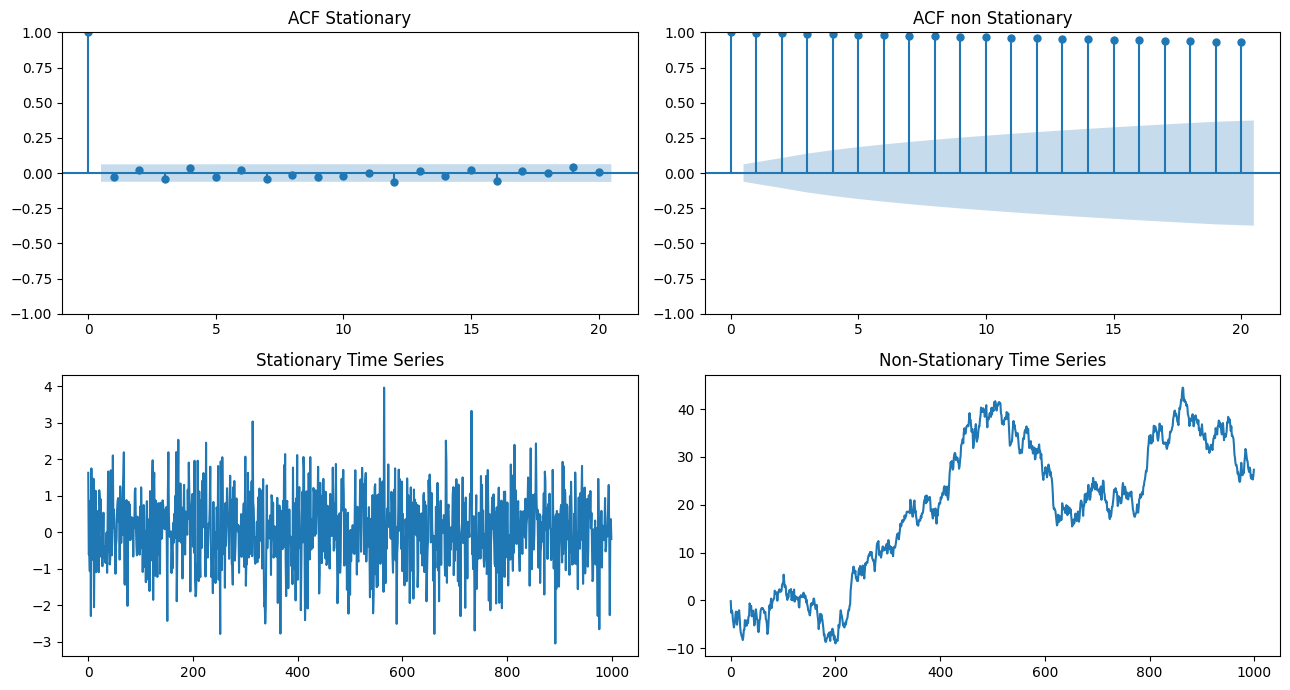

In [9]:
# Generate a stationary time series
np.random.seed(1)
stationary_ts = np.random.normal(0, 1, size=1000)

# Generate a non-stationary time series
nonstationary_ts = np.cumsum(np.random.normal(0, 1, size=1000))

# Compute the autocorrelation function for both time series
lags = 20
plt.subplots(2, 2, figsize=(13,7))
acf_stationary = plot_acf(stationary_ts, lags=lags, alpha=0.05, ax=plt.subplot(221), title='ACF Stationary')
acf_nonstationary = plot_acf(nonstationary_ts, lags=lags, alpha=0.05, ax=plt.subplot(222), title= 'ACF non Stationary')

# Plot the time series
plt.subplot(223)
plt.plot(stationary_ts)
plt.title("Stationary Time Series")

plt.subplot(224)
plt.plot(nonstationary_ts)
plt.title("Non-Stationary Time Series")

plt.tight_layout()
plt.show()

## Ice Cream Production Data

In [6]:
#read data
df_ice_cream = pd.read_csv(os.path.join(data_folder, 'ice_cream.csv'))

In [7]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [8]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [9]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [10]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [11]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [12]:
#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


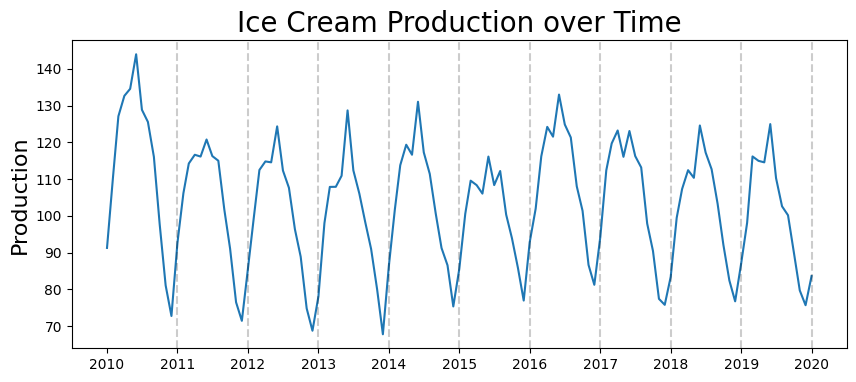

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

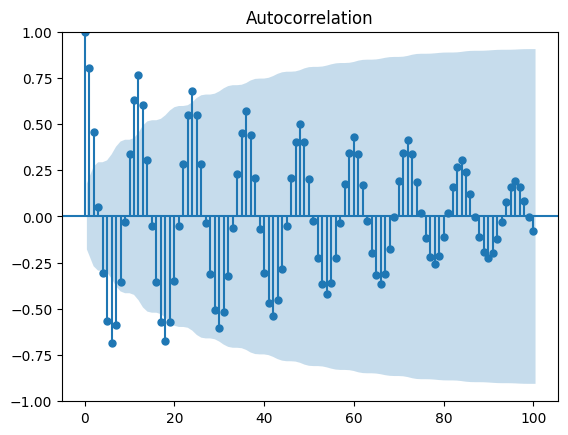

In [14]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

## Based on decaying ACF, we are likely dealing with an Auto Regressive process

# PACF

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


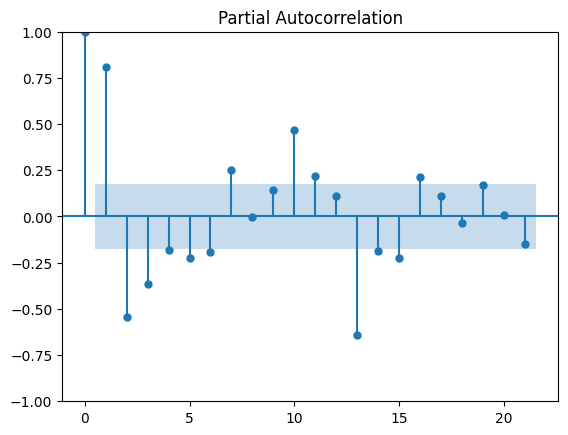

In [15]:
pacf_plot = plot_pacf(df_ice_cream.production)

## Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

# On stock data

In [19]:
import yfinance as yf

In [20]:
#define the ticker symbol
tickerSymbol = 'SPY'

In [21]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [22]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [23]:
tickerDf = tickerDf[['Close']]

In [24]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,176.788849
2015-01-05 00:00:00-05:00,173.596115
2015-01-06 00:00:00-05:00,171.961029
2015-01-07 00:00:00-05:00,174.103851
2015-01-08 00:00:00-05:00,177.193390


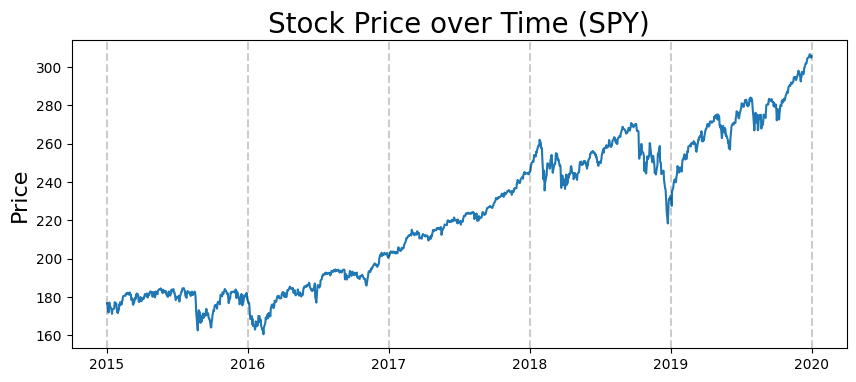

In [25]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Stationarity: take first difference of this series

In [26]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [27]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [28]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,176.788849,-3.192734
2015-01-05 00:00:00-05:00,173.596115,-1.635086
2015-01-06 00:00:00-05:00,171.961029,2.142822
2015-01-07 00:00:00-05:00,174.103851,3.089539
2015-01-08 00:00:00-05:00,177.193390,-1.419983


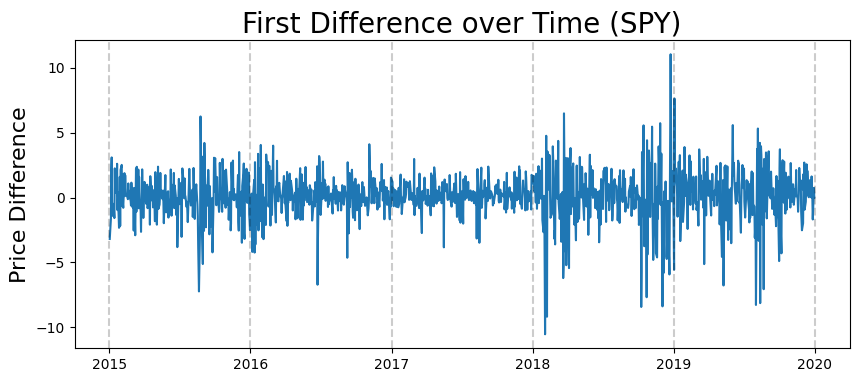

In [29]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

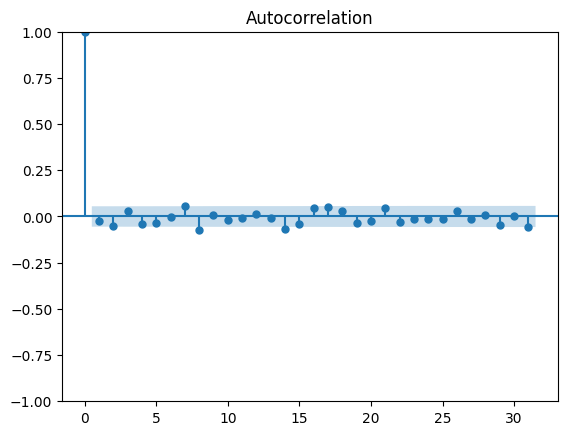

In [30]:
acf_plot = plot_acf(tickerDf.FirstDifference)

## ACF isn't that informative

# PACF

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


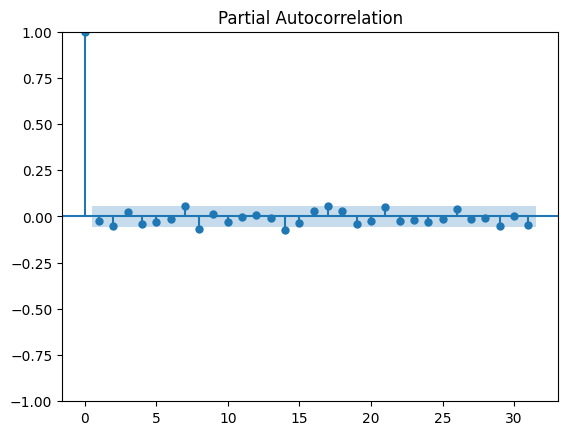

In [31]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

## PACF also doesn't tell us much